# fashion prevision 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df_training=pd.read_csv('fashion-mnist_train.csv',sep=',')
df_test=pd.read_csv('fashion-mnist_test.csv',sep=',')


In [3]:
df_training.shape

(60000, 785)

In [4]:
df_test.shape

(10000, 785)

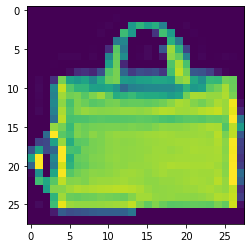

In [5]:
training=np.array(df_training, dtype='float32')
testing=np.array(df_test, dtype='float32')
plt.imshow(training[560, 1:].reshape(28,28))

In [6]:
import random

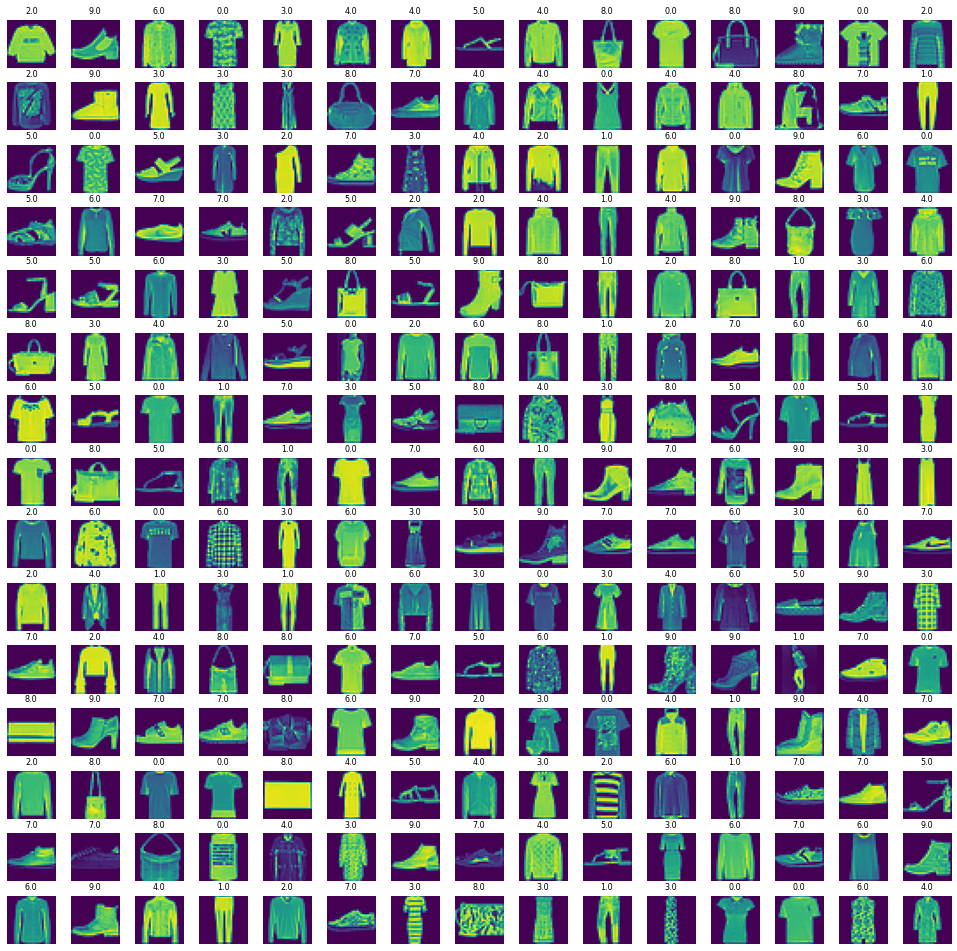

In [7]:

lgrid=15
wgrid=15
fig , axes=plt.subplots(lgrid,wgrid, figsize=(17,17))
axes=axes.ravel()
n_training=len(training)
for i in np.arange(0,lgrid*wgrid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(training[i,1:].reshape((28,28)))
    axes[i].set_title(training[i,0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3,wspace=0.2)


In [8]:
x_train=training[:,1:]/255
y_train=training[:,0]
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [9]:
x_test=testing[:,1:]/255
y_test=testing[:,0]
x_test.shape

(10000, 784)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_vald, y_train, y_vald = train_test_split(x_train,y_train, test_size=0.2, random_state=12345)

In [40]:
x_train=x_train.reshape(x_train.shape[0],*(28,28,1))
x_test=x_test.reshape(x_test.shape[0],*(28,28,1))
x_vald=x_vald.reshape(x_vald.shape[0],*(28,28,1))

In [41]:
x_train.shape

(38400, 28, 28, 1)

In [42]:
x_test.shape

(10000, 28, 28, 1)

In [43]:
x_vald.shape

(9600, 28, 28, 1)

In [49]:
from tensorflow import keras
from tensorflow.keras import layers

In [50]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [51]:
cnn_mod=Sequential()

In [52]:
cnn_mod.add(Conv2D(64,3,3,input_shape=(28,28,1),activation='relu'))

In [53]:
cnn_mod.add(MaxPooling2D(pool_size=(2,2)))

In [54]:
cnn_mod.add(Flatten())

In [55]:
cnn_mod.add(Dense(32, activation='relu'))

In [56]:
cnn_mod.add(Dense(10, activation='sigmoid'))

In [57]:
cnn_mod.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [58]:
cnn_mod.fit(x_train,y_train,batch_size=512,epochs=50,verbose=1,validation_data=(x_vald,y_vald))

Epoch 1/50
75/75 [==============================] - 9s 105ms/step - loss: 1.8550 - accuracy: 0.4643 - val_loss: 0.7832 - val_accuracy: 0.7171
Epoch 2/50
75/75 [==============================] - 8s 113ms/step - loss: 0.7306 - accuracy: 0.7392 - val_loss: 0.6280 - val_accuracy: 0.7697
Epoch 3/50
75/75 [==============================] - 11s 151ms/step - loss: 0.6193 - accuracy: 0.7798 - val_loss: 0.5694 - val_accuracy: 0.7941
Epoch 4/50
75/75 [==============================] - 10s 136ms/step - loss: 0.5688 - accuracy: 0.7946 - val_loss: 0.5338 - val_accuracy: 0.8047
Epoch 5/50
75/75 [==============================] - 10s 133ms/step - loss: 0.5330 - accuracy: 0.8091 - val_loss: 0.5191 - val_accuracy: 0.8087
Epoch 6/50
75/75 [==============================] - 8s 109ms/step - loss: 0.5075 - accuracy: 0.8133 - val_loss: 0.4845 - val_accuracy: 0.8269
Epoch 7/50
75/75 [==============================] - 8s 106ms/step - loss: 0.4962 - accuracy: 0.8155 - val_loss: 0.4694 - val_accuracy: 0.8294
Epo

In [59]:
evalmod=cnn_mod.evaluate(x_test,y_test)
print('test accuracy: {:.3f}'.format(evalmod[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.3448 - accuracy: 0.8746
test accuracy: 0.875


In [60]:
predicted_class=cnn_mod.predict_classes(x_test)

C:\Users\amina\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [61]:
predicted_class

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

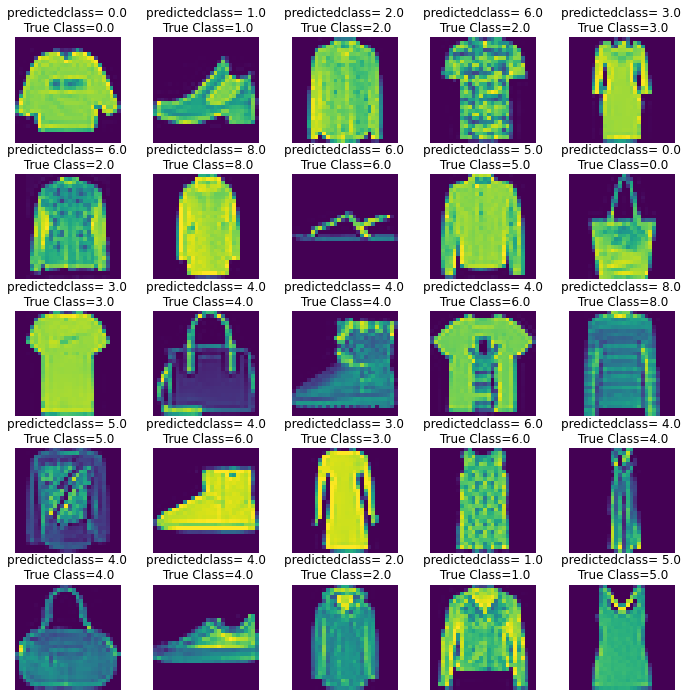

In [62]:
lg=5
wg=5
fig , axes=plt.subplots(lg,wg, figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,lg*wg):
    
    axes[i].imshow(training[i,1:].reshape((28,28)))
    axes[i].set_title("predictedclass= {:0.1f}\n True Class={:0.1f}".format(predicted_class[i],y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3,wspace=0.2)


In [63]:
from sklearn.metrics import classification_report
num_classes=10
target_name=["Class{}".format(i) for i in range(num_classes)]


In [64]:
print(classification_report(y_test,predicted_class))

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      1000
         1.0       0.97      0.98      0.98      1000
         2.0       0.79      0.80      0.79      1000
         3.0       0.88      0.90      0.89      1000
         4.0       0.79      0.81      0.80      1000
         5.0       0.98      0.94      0.96      1000
         6.0       0.68      0.63      0.65      1000
         7.0       0.90      0.95      0.92      1000
         8.0       0.96      0.97      0.97      1000
         9.0       0.95      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

